# StackOverflow
---

#### Import Libs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
sns.set_style('darkgrid')
pyo.init_notebook_mode()

#### Load Data

In [6]:
#load questions
df_questions = pd.read_csv('./TrainData/df_questions.csv', index_col = 0, engine='python')

   answer_count     score  creation_date  \
0      0.068966  0.139241   1.580538e+09   
1      0.000000  0.130802   1.580538e+09   
2      0.068966  0.118143   1.580538e+09   
3      0.068966  0.118143   1.580539e+09   
4      0.034483  0.118143   1.580539e+09   

                                               title  \
0          Are detailed logs availble in Prometheus?   
1  After spring/jackson-databind minor upgrade Ht...   
2  How to detect if USB device is plugged in usin...   
3         Performance for Firestore database writes?   
4  Get font from resources has bug in Java - Android   

                                                body  accepted_answer_id  \
0  <p>I am running Prometheus in Kubernetes and r...                 NaN   
1  <p>I had to upgrade several packages to pass a...                 NaN   
2  <p>I want to create a script that detects once...                 NaN   
3  <p>OS: Mac OS Catalina v 10.15.1</p>\n<p>Pytho...                 NaN   
4  <p>I write code

\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='is_closed', ylabel='count'>

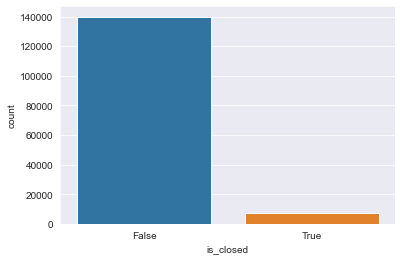

In [7]:
df_questions['is_closed'] = df_questions['closed_date'].apply(np.isfinite)
print(df_questions.head())
print(df_questions.groupby('is_closed').count())
sns.countplot(df_questions['is_closed'])

In [8]:
df_train, df_test = train_test_split(df_questions, test_size=0.2, random_state=42, stratify=df_questions["is_closed"])
df_train.sample(frac=1)
df_test.sample(frac=1)
df_train.to_csv(r'./TrainData/df_train.csv')
df_test.to_csv(r'./TrainData/df_test.csv')

In [5]:
df_train = pd.read_csv('./TrainData/df_train.csv', index_col = 0, engine='python')
df_test = pd.read_csv('./TrainData/df_test.csv', index_col = 0, engine='python')

#### Create Feature vector

##### use token column

In [62]:
df_train['tokenized_text'] = df_train["title_tokens"].astype(str).str.replace('\[|\]|\,|\'', '')+df_train["body_tokens"].astype(str).str.replace('\[|\]|\,|\'', '')
df_test['tokenized_text'] = df_test["title_tokens"].astype(str).str.replace('\[|\]|\,|\'', '')+df_test["body_tokens"].astype(str).str.replace('\[|\]|\,|\'', '')

<ipython-input-62-fdb4f77e60d5>:1: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-62-fdb4f77e60d5>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [63]:
tfv = TfidfVectorizer()
train_tfv = tfv.fit_transform(df_train['tokenized_text'].astype(str).values)
test_tfv = tfv.transform(df_test['tokenized_text'].astype(str).values)

In [64]:
print(tfv.idf_)
vocab = tfv.get_feature_names()
print(vocab[:100])
print("Vocabulary length:", len(vocab))
dist = np.sum(train_tfv, axis=0)
checking = pd.DataFrame(dist, columns = vocab)
checking

[ 8.63513437  8.893996    9.5001318  ... 11.98503845 11.98503845
 11.98503845]
['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaayyyyyyyyyyyyyyyy', 'aaaaab', 'aaaaabbbbbbb', 'aaaaand', 'aaaabbbcccddaaabb', 'aaaabbccaa', 'aaaabbyy', 'aaaand', 'aaab', 'aaabbbccc', 'aaabbbcccddd', 'aaabbbccdddeef', 'aaaca', 'aaaccaaca', 'aaaccgtgccctca', 'aaah', 'aaai', 'aaand', 'aaaprocess', 'aaargh', 'aab', 'aabaaabaaaaab', 'aabapp', 'aabb', 'aabbbaa', 'aabbc', 'aabbcc', 'aabbccdd', 'aabbs', 'aabbtree', 'aabc', 'aabcc', 'aabefddbccffaa', 'aac', 'aacraid', 'aad', 'aadajx', 'aadauthenticationfailedexception', 'aadauthenticationfilter', 'aadauthenticationinservicefabricmonitoringeffect', 'aadhaar', 'aadhar', 'aadi', 'aadtokencredentials', 'aafe', 'aag', 'aagb', 'aage', 'aaj', 'aalongpubname', 'aam', 'aamir', 'aamva', 'aand', 'aanjulena', 'aankhe', 'aankho', 'aanmassage', 'aao', 'aap', 'aapl', 'aapt',

aa        aaa      aaaa     aaaaa    aaaaaa   aaaaaaa  aaaaaaaa  \
0  13.587423  11.581391  5.782185  1.793033  0.733645  0.657439  0.285439   

   aaaaaaaaa  aaaaaaaaaaaaaa  aaaaaaaaaaaaaaaa  ...  zzmaster       zzu  \
0   0.254888        0.201411          0.166407  ...  0.260612  0.009527   

        zzv       zzw       zzz      zzzz    zzzzzz  zzzzzzzz  zzzzzzzzzzzz  \
0  0.009527  0.009527  2.796553  0.413991  0.108026  0.255649      0.272654   

   zzzzzzzzzzzzzzzzzzzzzzzz  
0                  0.150245  

[1 rows x 178008 columns]

In [65]:
cv = CountVectorizer()
train_cv = cv.fit_transform(df_train['tokenized_text'].astype(str).values)
test_cv = cv.transform(df_test['tokenized_text'].astype(str).values)

In [66]:
print(cv.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaayyyyyyyyyyyyyyyy', 'aaaaab', 'aaaaabbbbbbb', 'aaaaand', 'aaaabbbcccddaaabb', 'aaaabbccaa', 'aaaabbyy', 'aaaand', 'aaab', 'aaabbbccc', 'aaabbbcccddd', 'aaabbbccdddeef', 'aaaca', 'aaaccaaca', 'aaaccgtgccctca', 'aaah', 'aaai', 'aaand', 'aaaprocess', 'aaargh', 'aab', 'aabaaabaaaaab', 'aabapp', 'aabb', 'aabbbaa', 'aabbc', 'aabbcc', 'aabbccdd', 'aabbs', 'aabbtree', 'aabc', 'aabcc', 'aabefddbccffaa', 'aac', 'aacraid', 'aad', 'aadajx', 'aadauthenticationfailedexception', 'aadauthenticationfilter', 'aadauthenticationinservicefabricmonitoringeffect', 'aadhaar', 'aadhar', 'aadi', 'aadtokencredentials', 'aafe', 'aag', 'aagb', 'aage', 'aaj', 'aalongpubname', 'aam', 'aamir', 'aamva', 'aand', 'aanjulena', 'aankhe', 'aankho', 'aanmassage', 'aao', 'aap', 'aapl', 'aapt', 'aar', 'aardvarkzebra', 'aareading', 'aaron', 'aaronengland', 'aasa', 'aascrip

In [67]:
print(df_test['tokenized_text'])

55326     add large image uislider background place with...
104257    global platform secure channel computation exa...
91944     reactive form select tag validationworking rea...
142466    scala future returning empty list awaitprogram...
104953    show subheading storybookneed show subheading ...
                                ...                        
89454     bring nlopt work macos catalina homebrewfirst ...
140403    quot chrome reachable quot using xvfb non head...
56993     python set dataframe parameter function python...
28832     parsing json key value snowflake key dotsample...
72688     define execute function python scriptknow defi...
Name: tokenized_text, Length: 29493, dtype: object


##### use clean column (deprecated)

In [ ]:
tfv = TfidfVectorizer()
train_tfv = tfv.fit_transform((df_train['title_clean'].astype(str) + ' ' + df_train['body_clean']).values.astype('U'))
test_tfv = tfv.transform((df_test['title_clean'].astype(str) + ' ' + df_test['body_clean']).values.astype('U'))

In [ ]:
print(tfv.idf_)
print(train_tfv)

In [ ]:
vocab = tfv.get_feature_names()
print(vocab[:100])
print("Vocabulary length:", len(vocab))
dist = np.sum(train_tfv, axis=0)
checking = pd.DataFrame(dist, columns = vocab)
checking

### Sampling imbalanced data

#### Option1: Undersampling - 0.8:0.2 split then undersampling

In [42]:
#option1: undersampling
df_class_under_true = df_train[df_train['is_closed'] == True]
df_class_under_false = df_train[df_train['is_closed'] == False]

df_class_under_false = df_class_under_false.sample(df_class_under_true.is_closed.count())
df_train_under = pd.concat([df_class_under_false, df_class_under_true], axis=0)


df_train_under["is_closed"] = df_train_under["is_closed"].astype(int)
df_train_under.count

#Shuffle the Data
df_train_under.sample(frac=1)

#compute class weight
class_weight_under = {0: df_train_under.shape[0]/2/df_train_under[df_train_under['is_closed'] == False].shape[0], 1: df_train_under.shape[0]/2/df_train_under[df_train_under['is_closed'] == True].shape[0]}
print(class_weight_under)
class_weight_test = {0: df_test.shape[0]/2/df_test[df_test['is_closed'] == False].shape[0], 1: df_test.shape[0]/2/df_test[df_test['is_closed'] == True].shape[0]}
print(class_weight_test)
print(df_train_under.groupby('is_closed').count())
print(df_test.groupby('is_closed').count())

{0: 1.0, 1: 1.0}
{0: 0.5271690558753084, 1: 9.701644736842105}
           answer_count  score  creation_date  title  body  \
is_closed                                                    
0                  6078   6078           6078   6078  6078   
1                  6080   6080           6080   6080  6080   

           accepted_answer_id  closed_date  closed_reason  \
is_closed                                                   
0                        2629            0              0   
1                        2300         6080           6080   

           has_accepted_answer  title_tokens  title_word_count  title_clean  \
is_closed                                                                     
0                         6078          6078              6078         6078   
1                         6080          6080              6080         6080   

           body_tokens  body_word_count  body_has_code  body_clean  \
is_closed                                               

In [43]:
#Save the file
df_train_under.to_csv(r'./TrainData/df_train_under.csv')

#### Option2: Oversampling - 0.8:0.2 split then SMOTE oversampling

In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(df_train['is_closed']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df_train['is_closed']==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(data_train_embedding_test, df_train['is_closed'].ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 6080
Before OverSampling, counts of label '0': 111889 

After OverSampling, the shape of train_X: (223778, 768)
After OverSampling, the shape of train_y: (223778,) 

After OverSampling, counts of label '1': 111889
After OverSampling, counts of label '0': 111889


##### Naive

In [ ]:
#option2: oversampling
df_class_over_true = df_train[df_train['is_closed'] == True]
df_class_over_false = df_train[df_train['is_closed'] == False]

df_class_over_false = df_class_over_false.sample(df_class_over_true.is_closed.count())
df_train_over = pd.concat([df_class_over_false, df_class_over_true], axis=0)


df_train_over["is_closed"] = df_train_over["is_closed"].astype(int)
df_train_over.count

#Shuffle the Data
df_train_over.sample(frac=1)

#compute class weight
class_weight_over = {0: df_train_over.shape[0]/2/df_train_over[df_train_over['is_closed'] == False].shape[0], 1: df_train_over.shape[0]/2/df_train_over[df_train_over['is_closed'] == True].shape[0]}
print(class_weight_over)
class_weight_test = {0: df_test.shape[0]/2/df_test[df_test['is_closed'] == False].shape[0], 1: df_test.shape[0]/2/df_test[df_test['is_closed'] == True].shape[0]}
print(class_weight_test)
print(df_train_over.groupby('is_closed').count())
print(df_test.groupby('is_closed').count())

In [ ]:
#Save the file
df_train_over.to_csv(r'./TrainData/df_train_over.csv')

#### Option3: Ensemble sampling - 0.8:0.2 split then oversampling+undersampling

In [70]:
print("Before EnsembleSampling, counts of label '1': {}".format(sum(df_train['is_closed']==1)))
print("Before EnsembleSampling, counts of label '0': {} \n".format(sum(df_train['is_closed']==0)))

se = SMOTEENN(random_state=42)
X_train_res, y_train_res = se.fit_resample(train_tfv, df_train['is_closed'].ravel())

print('After EnsembleSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After EnsembleSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After EnsembleSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After EnsembleSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before EnsembleSampling, counts of label '1': 6080
Before EnsembleSampling, counts of label '0': 111889 

After EnsembleSampling, the shape of train_X: (125159, 178008)
After EnsembleSampling, the shape of train_y: (125159,) 

After EnsembleSampling, counts of label '1': 111887
After EnsembleSampling, counts of label '0': 13272


In [ ]:
#option3: ensemble sampling
df_class_ensemble_true = df_train[df_train['is_closed'] == True]
df_class_ensemble_false = df_train[df_train['is_closed'] == False]

df_class_ensemble_false = df_class_ensemble_false.sample(df_class_ensemble_true.is_closed.count())
df_train_ensemble = pd.concat([df_class_ensemble_false, df_class_ensemble_true], axis=0)


df_train_ensemble["is_closed"] = df_train_ensemble["is_closed"].astype(int)
df_train_ensemble.count

#Shuffle the Data
df_train_ensemble.sample(frac=1)

#compute class weight
class_weight_ensemble = {0: df_train_ensemble.shape[0]/2/df_train_ensemble[df_train_ensemble['is_closed'] == False].shape[0], 1: df_train_ensemble.shape[0]/2/df_train_ensemble[df_train_ensemble['is_closed'] == True].shape[0]}
print(class_weight_ensemble)
class_weight_test = {0: df_test.shape[0]/2/df_test[df_test['is_closed'] == False].shape[0], 1: df_test.shape[0]/2/df_test[df_test['is_closed'] == True].shape[0]}
print(class_weight_test)
print(df_train_ensemble.groupby('is_closed').count())
print(df_test.groupby('is_closed').count())

In [ ]:
#Save the file
df_train_ensemble.to_csv(r'./TrainData/df_train_ensemble.csv')

#### Option4: No sampling - 0.8:0.2 split then use whole data

In [ ]:
df_train["is_closed"] = df_train["is_closed"].astype(int)
df_train.count

#Shuffle the Data
df_train.sample(frac=1)

#compute class weight
class_weight = {0: df_train.shape[0]/2/df_train[df_train['is_closed'] == False].shape[0], 1: df_train.shape[0]/2/df_train[df_train['is_closed'] == True].shape[0]}
print(class_weight)
class_weight_test = {0: df_test.shape[0]/2/df_test[df_test['is_closed'] == False].shape[0], 1: df_test.shape[0]/2/df_test[df_test['is_closed'] == True].shape[0]}
print(class_weight_test)
print(df_train.groupby('is_closed').count())
print(df_test.groupby('is_closed').count())

In [ ]:
#Save the file
df_train.to_csv(r'./TrainData/df_train.csv')

## Classification Model

##### Prepare training and test data

In [8]:
# Use embedding
data_train_embedding_test = np.load('TrainData/data_train_embedding.npy')
data_test_embedding_test = np.load('TrainData/data_test_embedding.npy')

train_X = data_train_embedding_test
test_X = data_test_embedding_test
train_Y = df_train['is_closed'].values
test_Y = df_test['is_closed'].values
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(117969, 768)
(29493, 768)
(117969,)
(29493,)


In [24]:
# with sampling
train_X = X_train_res
test_X = data_test_embedding_test
train_Y = y_train_res
test_Y = df_test['is_closed'].values
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)


(223778, 768)
(29493, 768)
(223778,)
(29493,)


In [48]:
# without sampling
train_X = train_tfv
test_X = test_tfv
train_Y = df_train_under['is_closed'].values
test_Y = df_test['is_closed'].values
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(12160, 32309)
(29493, 32309)
(12160,)
(29493,)


##### Logistic Regression POC

Training Accuracy : 0.8967503507940906
Validation Accuracy : 0.8227036924015868
[[23665  4308]
 [  921   599]]
Logistic Regression - Training Result
              precision    recall  f1-score   support

       False     0.8729    0.9167    0.8942    106542
        True     0.9206    0.8787    0.8992    117236

    accuracy                         0.8968    223778
   macro avg     0.8968    0.8977    0.8967    223778
weighted avg     0.8979    0.8968    0.8968    223778

Logistic Regression - Validation Result
              precision    recall  f1-score   support

       False     0.8460    0.9625    0.9005     24586
        True     0.3941    0.1221    0.1864      4907

    accuracy                         0.8227     29493
   macro avg     0.6200    0.5423    0.5435     29493
weighted avg     0.7708    0.8227    0.7817     29493



<AxesSubplot:>

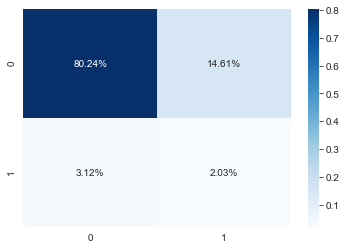

In [25]:
from sklearn import linear_model

logisticReg = linear_model.LogisticRegressionCV(cv=5, solver='lbfgs',class_weight='balanced', max_iter=10000)
logisticReg.fit(train_X, train_Y)

Y_lr_predict=logisticReg.predict(test_X)
print("Training Accuracy :", logisticReg.score(train_X, train_Y))
print("Validation Accuracy :", logisticReg.score(test_X, test_Y))
cm = confusion_matrix(test_Y, Y_lr_predict)
print(cm)
print("Logistic Regression - Training Result")
print(classification_report(logisticReg.predict(train_X),train_Y,digits=4))
print("Logistic Regression - Validation Result")
print(classification_report(Y_lr_predict,test_Y, digits=4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##### Multi-layer Perceptron Classifier

In [ ]:
MLP = MLPClassifier(random_state = 42)

mlp_param_grid = {
    'hidden_layer_sizes':[(5)],
    'activation':['relu'],
    'solver':['adam'],
    'alpha':[0.3],
    'learning_rate':['constant'],
    'max_iter':[1000]
}

kfold = StratifiedKFold( n_splits = 5, random_state = 42, shuffle=True )
gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, n_jobs= 1, verbose = 10)
gsMLP.fit(train_X, train_Y)
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_

In [ ]:
gsMLP.best_score_
MLP_Y_predict = gsMLP.predict(test_X)
print("Training Accuracy :", gsMLP.score(train_X, train_Y))
print("Validation Accuracy :", gsMLP.score(test_X, test_Y))
cm = confusion_matrix(test_Y, MLP_Y_predict)
print(cm)
print("MLP Classifier - Training Result")
print(classification_report(gsMLP.predict(train_X),train_Y,digits=4))
print("MLP Classifier - Validation Result")
print(classification_report(MLP_Y_predict,test_Y, digits=4))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')